In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rustic.generator import Generator
from rustic.filters import resonant_bandpass
from rustic import figures
from IPython.display import Audio
from rustic.utils import generate_bezier
from numpy import loadtxt

## Step 1
Generate metallic noise. Uses multiple unrelated square wave generators to create a metallic noise.

In [2]:
waves = [
    Generator(freq=123, shape="square"),
    Generator(freq=150, shape="square"),
    Generator(freq=180, shape="square"),
    Generator(freq=219, shape="square"),
    Generator(freq=240, shape="square"),
    Generator(freq=261, shape="square"),
]

SAMPLE_RATE = 44100
SAMPLE_DURATION = 5  # in seconds
CENTER_FREQ = (10e3 + 400) / 2

In [3]:
samples = [
    sum([
        g.tick(1.0 / SAMPLE_RATE)
        for g in waves
    ]) / len(waves)
    for _sample in range(1, int(SAMPLE_RATE * SAMPLE_DURATION) + 1)
]

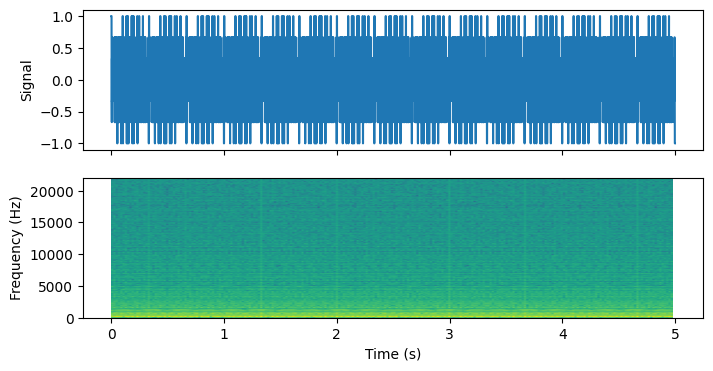

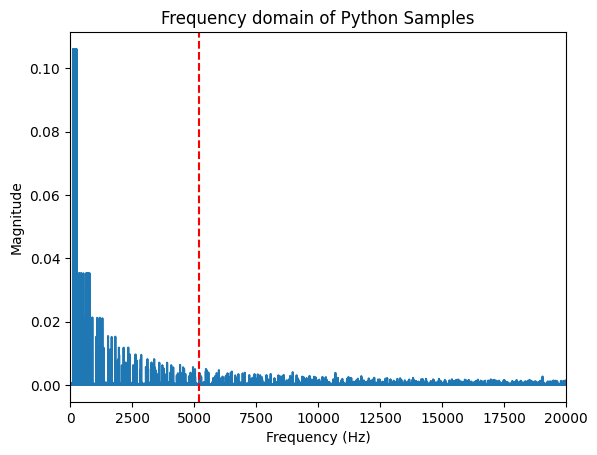

In [4]:
figures.spectrogram(samples, SAMPLE_RATE)
figures.freq_display(samples, SAMPLE_RATE, "Python Samples", draw_line_at=CENTER_FREQ)

## Audio result

In [5]:
Audio(samples, rate=SAMPLE_RATE)

# Band pass the signal
Cutoff higher and lower frequencies to keep it between ~400Hz to 10kHz

In [6]:
filtered_samples = resonant_bandpass(samples, CENTER_FREQ, 20, SAMPLE_RATE)
rust_samples = loadtxt("../.dist/HiHat/hihat_output.txt", comments="#", delimiter=" ", unpack=False)

/var/folders/kv/bs0kv9hn6kzgcnljnrs6878m0000gp/T/ipykernel_55579/2611862216.py:2: UserWarning: loadtxt: input contained no data: "../.dist/HiHat/hihat_output.txt"
  rust_samples = loadtxt("../.dist/HiHat/hihat_output.txt", comments="#", delimiter=" ", unpack=False)


/Users/florentgrimau/Documents/code/rustic/dev/rustic/figures.py:16: UserWarning: Only one segment is calculated since parameter NFFT (=0) >= signal length (=0).
  Pxx, freqs, bins, im = ax2.specgram(signal, NFFT=NFFT, Fs=sample_rate)


ValueError: noverlap must be less than NFFT

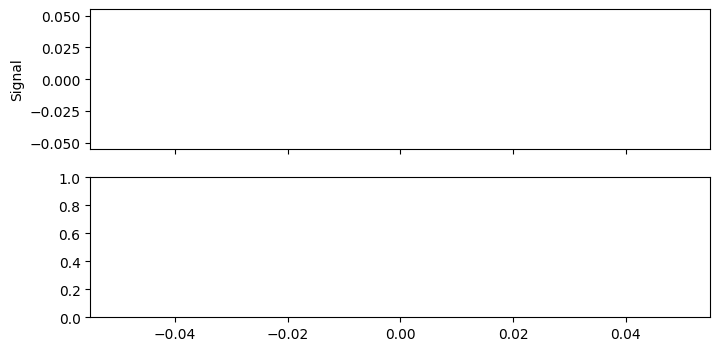

In [7]:
figures.spectrogram(rust_samples[0:400], SAMPLE_RATE, title="Rust samples spectrogram")
figures.spectrogram(filtered_samples[0:400], SAMPLE_RATE, title="Python samples spectrogram")

## Comparison of frequencies at cutoff frequencies

In [ ]:
figures.freq_display(rust_samples, SAMPLE_RATE, "Rust Samples", draw_line_at=CENTER_FREQ)
figures.freq_display(filtered_samples, SAMPLE_RATE, "Filtered Samples", draw_line_at=CENTER_FREQ)

In [ ]:
figures.freq_compare(
    filtered_samples,
    rust_samples,
    sr=SAMPLE_RATE,
    sig1_name="Python",
    sig2_name="Rust",
    focus_window=(4900, 5100),
)

## Sound comparison
Unfiltered

In [ ]:
Audio(samples, rate=SAMPLE_RATE)

Filtered

In [8]:
Audio(filtered_samples, rate=SAMPLE_RATE)

In [ ]:
ampl_from = 4.0
ampl_to = 0.0
ampl_duration = 0.5
ampl_control = (0.0, 0.0)

ampl_modulation = lambda x: generate_bezier(x, _from=ampl_from, to=ampl_to, duration=ampl_duration, control=ampl_control)
amplitude_curve = [ampl_modulation(x / SAMPLE_RATE) for x in range(int(SAMPLE_DURATION * SAMPLE_RATE))]

time_scale = np.linspace(0.0, SAMPLE_DURATION, int(SAMPLE_DURATION * SAMPLE_RATE))

plt.plot(time_scale, filtered_samples * amplitude_curve, label="enveloped signal")
# plt.plot(time_scale, filtered_samples, label="original signal")

plt.plot(time_scale, amplitude_curve, label="Amplitude curve")
plt.plot(0.0, ampl_from, "gx", label="Amplitude start")
plt.plot(ampl_duration, ampl_to, "bx", label="Amplitude end")
plt.plot(ampl_control[0], ampl_control[1], "rx", label="Amplitude control")

plt.legend()
plt.title("Enveloped signal")

In [ ]:
ampl_from = 4.0
ampl_to = 0.0
ampl_duration = 0.5
ampl_control = (0.0, 0.0)

ampl_modulation = lambda x: generate_bezier(x, _from=ampl_from, to=ampl_to, duration=ampl_duration, control=ampl_control)
amplitude_curve = [ampl_modulation(x / SAMPLE_RATE) for x in range(int(SAMPLE_DURATION * SAMPLE_RATE))]

signal = list(filtered_samples * amplitude_curve)
for x in range(10):
    signal.extend(list(filtered_samples * amplitude_curve))

Audio(signal, rate=SAMPLE_RATE)